In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df_test = pd.read_excel("Loan_Data_train.xlsx")
df_train = pd.read_excel("Loan_Data_test.xlsx")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


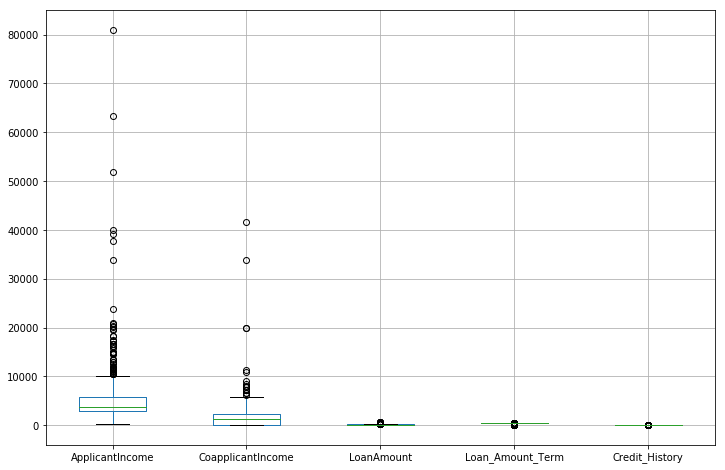

In [6]:
plt.figure(figsize=(12,8))
df_train.boxplot()
plt.show()

<Figure size 2160x576 with 0 Axes>

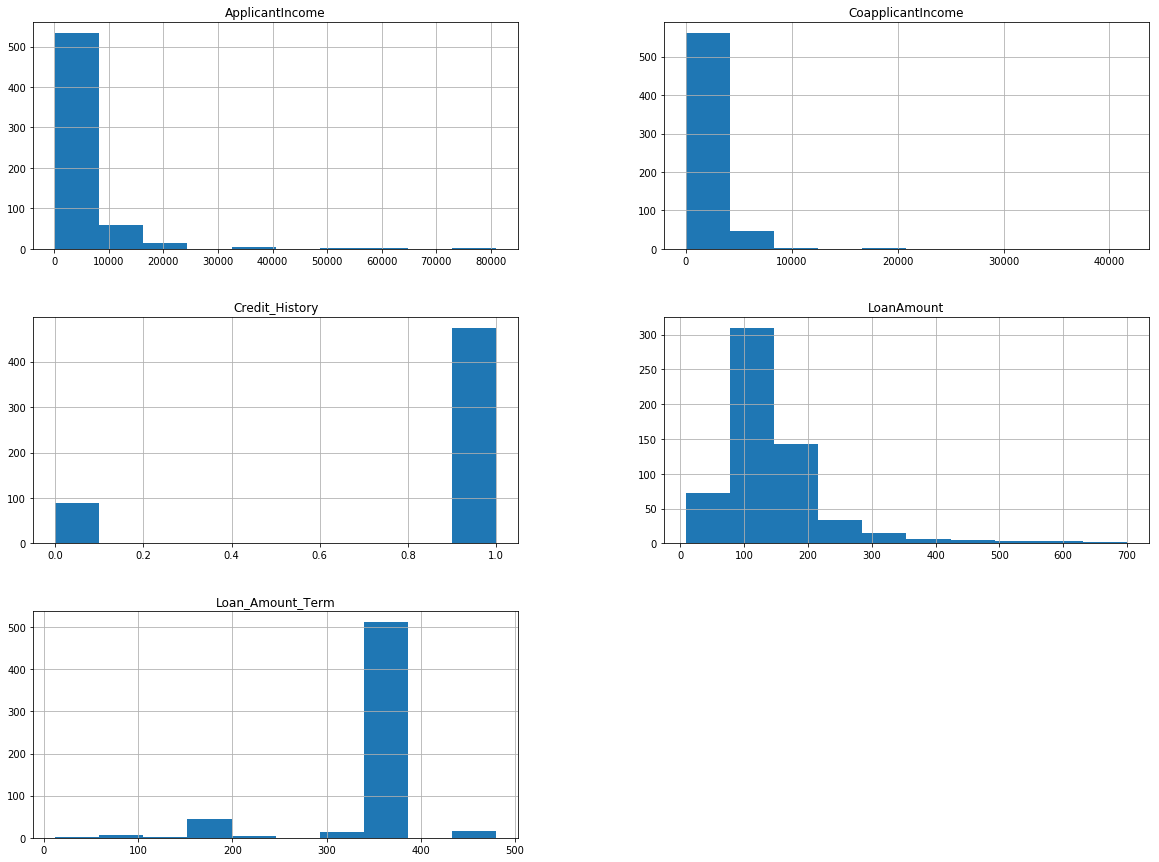

In [7]:
plt.figure(figsize=(30,8))
df_train.hist(figsize=(20,15))
plt.show()

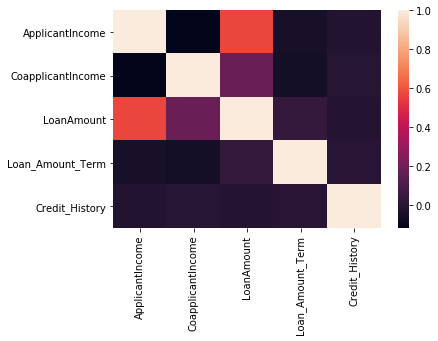

In [8]:
sns.heatmap(df_train.corr())

In [9]:
df_train.shape
#df_train.isna().sum()

(614, 13)

In [3]:
df_train.loc[df_train['Loan_Status'] == 'Y', 'Loan_Status'] = 1
df_train.loc[df_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
X = df_train.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = df_train['Loan_Status']

In [4]:
cat_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for category in cat_var:
    onehot = pd.get_dummies(X[category], prefix=category)
    X = X.drop(category, axis=1)
    X = X.join(onehot)

In [5]:
X.isna().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [6]:
X.fillna(df_train.median(),inplace=True)

In [7]:
X.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [8]:

X_test = df_test.drop(['Loan_ID'], axis = 1)
cat_var = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for category in cat_var:
    onehot = pd.get_dummies(X_test[category], prefix=category)
    X_test = X_test.drop(category, axis=1)
    X_test = X_test.join(onehot)
    

In [9]:
X_test.fillna(df_test.median(),inplace=True)
X_test.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X,y)

C:\Users\soura\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X)

In [19]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y, y_pred_train, labels=[0, 1])
print("Confusion Matrix :",con_mat)
tn, fp, fn, tp = con_mat.ravel()
print("TN:", tn, 'FP:', fp, 'FN:', fn, 'TP:',tp)
accuracy = (tn + tp)/y.size
print("Accuracy :",accuracy)


Confusion Matrix : [[118  74]
 [ 71 351]]
TN: 118 FP: 74 FN: 71 TP: 351
Accuracy : 0.7638436482084691


In [20]:
df_test['Loan_Status'] = y_pred_test
df_test.loc[df_test['Loan_Status'] == 1, 'Loan_Status'] = 'Y'
df_test.loc[df_test['Loan_Status'] == 0, 'Loan_Status'] = 'N'
df_test.to_excel("Loan_Test_Data_Prediction.xlsx")

### Using Support Vector Machine

In [21]:
from sklearn.svm import SVC
svc_rbf=SVC(kernel='linear')
svc_rbf.fit(X,y)
y_pred_test=svc_rbf.predict(X_test)
y_pred_train=svc_rbf.predict(X)


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred_train)
print("Confusion Mattrix :",cm)

from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(y,y_pred_train))

Confusion Mattrix : [[ 75 117]
 [  6 416]]
Accuracy : 0.7996742671009772


# Using Decision Tree

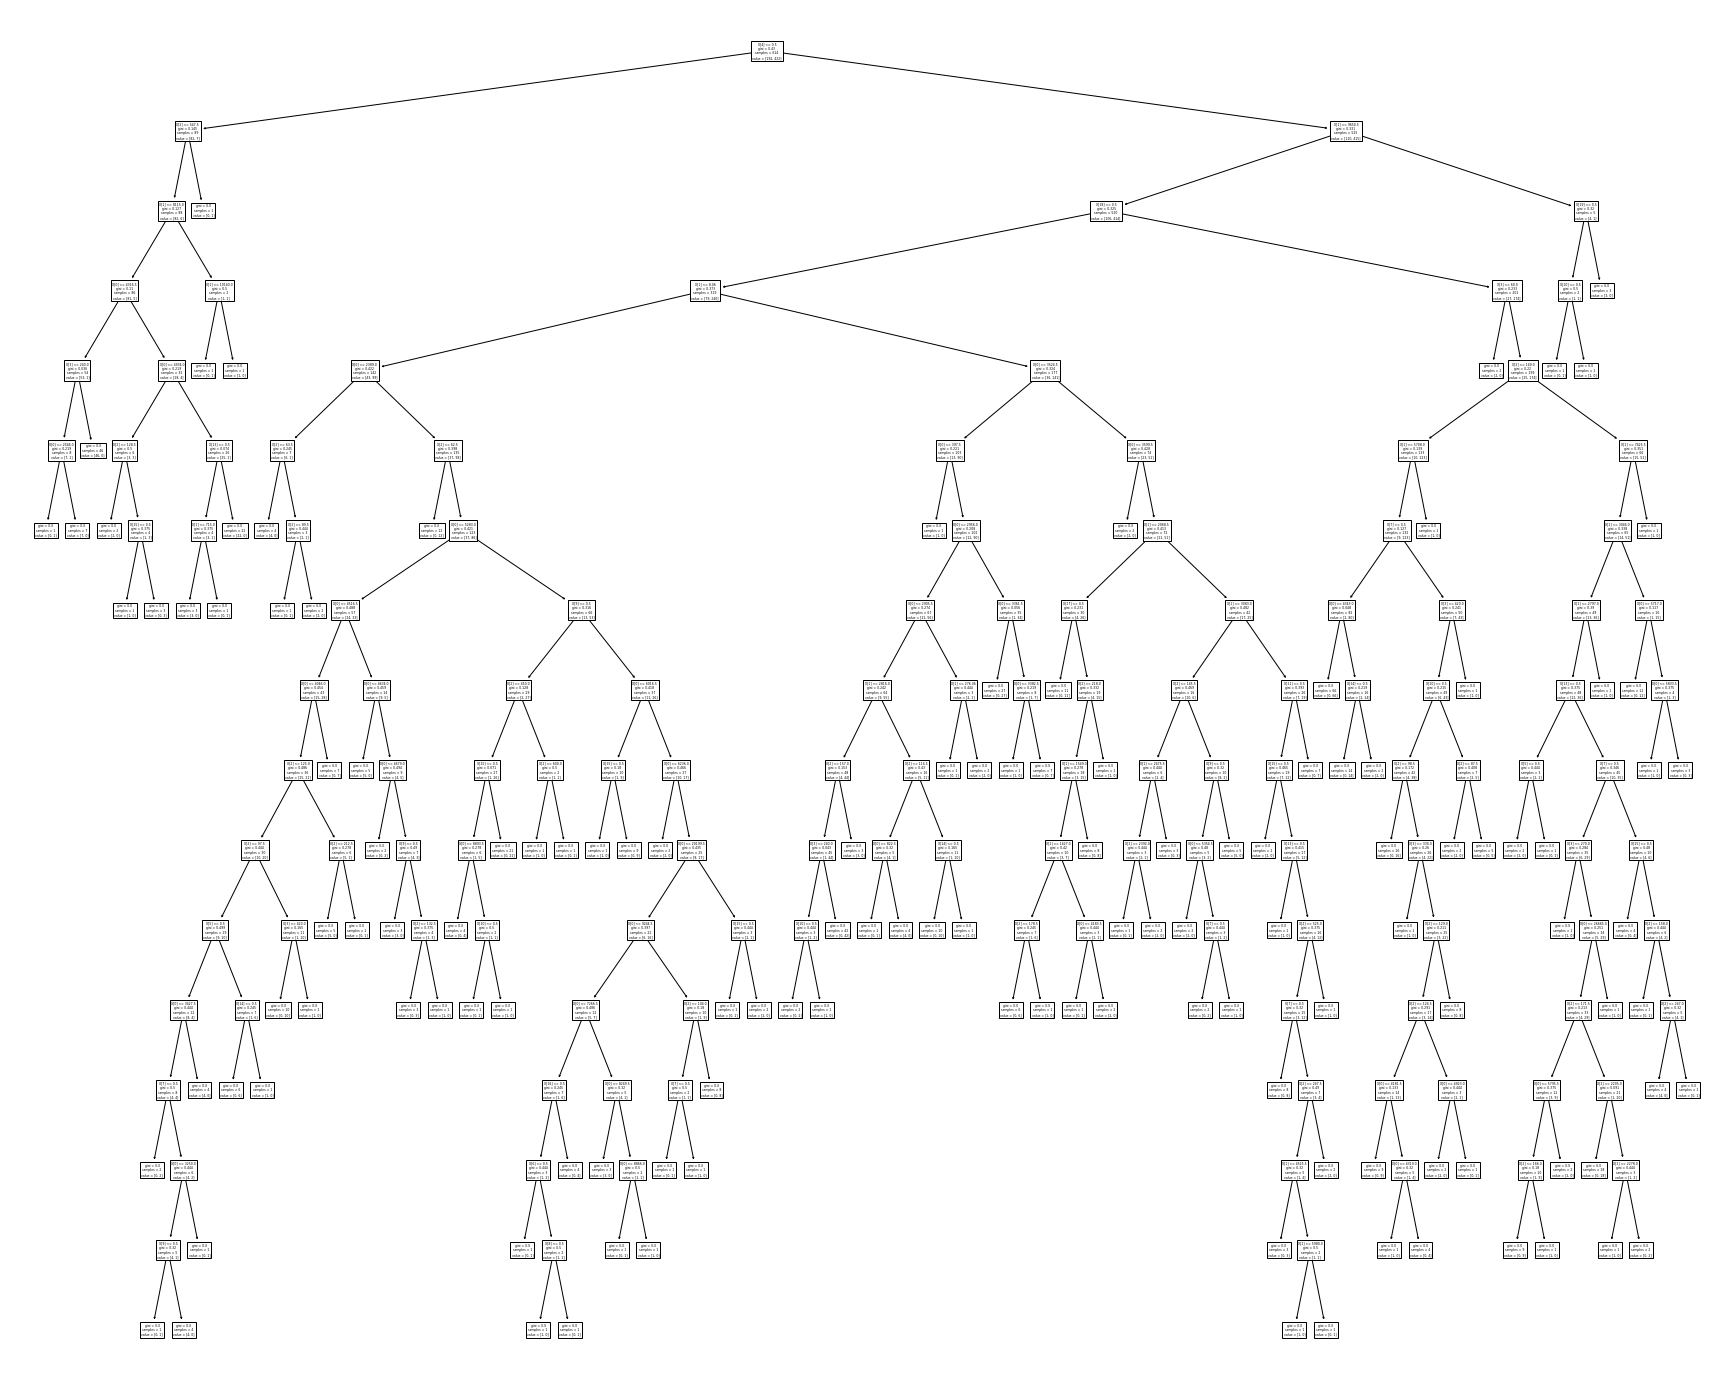

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(30,25))
tree.plot_tree(clf.fit(X, y))
plt.show()

In [13]:
y_pred_dec_t = clf.predict(X)
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y, y_pred_dec_t, labels=[0, 1])
print("Confusion Matrix :",con_mat)
tn, fp, fn, tp = con_mat.ravel()
print("TN:", tn, 'FP:', fp, 'FN:', fn, 'TP:',tp)
accuracy = (tn + tp)/y.size
print("Accuracy :",accuracy)

Confusion Matrix : [[192   0]
 [  0 422]]
TN: 192 FP: 0 FN: 0 TP: 422
Accuracy : 1.0


# Using Bagging Classifier

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=SVC(),n_estimators=100, random_state=10).fit(X, y)
y_pred_bag = bag_clf.predict(X)

In [27]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y, y_pred_bag, labels=[0, 1])
print("Confusion Matrix :",con_mat)
tn, fp, fn, tp = con_mat.ravel()
print("TN:", tn, 'FP:', fp, 'FN:', fn, 'TP:',tp)
accuracy = (tn + tp)/y.size
print("Accuracy :",accuracy)

Confusion Matrix : [[  3 189]
 [  0 422]]
TN: 3 FP: 189 FN: 0 TP: 422
Accuracy : 0.6921824104234527


In [28]:
bag_clf.score(X,y)

0.6921824104234527

# Using Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(max_depth=5, random_state=0)
random_clf.fit(X, y)
print(random_clf.feature_importances_)
y_pred_random = (random_clf.predict(X))

[0.08348663 0.0652672  0.08311319 0.04472307 0.53484057 0.00788926
 0.00878122 0.02004363 0.01384663 0.00939385 0.01345103 0.00989904
 0.00740718 0.01382178 0.01387266 0.00823034 0.00541981 0.01971331
 0.03000937 0.00679024]


In [30]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y, y_pred_random, labels=[0, 1])
print("Confusion Matrix :",con_mat)
tn, fp, fn, tp = con_mat.ravel()
print("TN:", tn, 'FP:', fp, 'FN:', fn, 'TP:',tp)
accuracy = (tn + tp)/y.size
print("Accuracy :",accuracy)

Confusion Matrix : [[ 84 108]
 [  6 416]]
TN: 84 FP: 108 FN: 6 TP: 416
Accuracy : 0.8143322475570033


In [31]:
random_clf.score(X,y)

0.8143322475570033

# Using Boosting -- Adaboost

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=10)
ada_clf.fit(X, y)
print(ada_clf.feature_importances_)
y_pred_ada = (ada_clf.predict(X))

[0.48 0.16 0.21 0.05 0.03 0.   0.   0.01 0.   0.   0.01 0.01 0.   0.01
 0.   0.01 0.   0.01 0.01 0.  ]


In [35]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y, y_pred_ada, labels=[0, 1])
print("Confusion Matrix :",con_mat)
tn, fp, fn, tp = con_mat.ravel()
print("TN:", tn, 'FP:', fp, 'FN:', fn, 'TP:',tp)
accuracy = (tn + tp)/y.size
print("Accuracy :",accuracy)
print("Accuracy_inbuilt :",ada_clf.score(X,y))

Confusion Matrix : [[113  79]
 [  9 413]]
TN: 113 FP: 79 FN: 9 TP: 413
Accuracy : 0.8566775244299675
Accuracy_inbuilt : 0.8566775244299675


# Using Histogram-based Gradient Boosting Classification Tree.



In [41]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
grad_clf = HistGradientBoostingClassifier()
grad_clf.fit(X, y)
y_pred_grad = (grad_clf.predict(X))

In [40]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y, y_pred_grad, labels=[0, 1])
print("Confusion Matrix :",con_mat)
tn, fp, fn, tp = con_mat.ravel()
print("TN:", tn, 'FP:', fp, 'FN:', fn, 'TP:',tp)
accuracy = (tn + tp)/y.size
print("Accuracy :",accuracy)
print("Accuracy_inbuilt :",grad_clf.score(X,y))

Confusion Matrix : [[187   5]
 [  0 422]]
TN: 187 FP: 5 FN: 0 TP: 422
Accuracy : 0.99185667752443
Accuracy_inbuilt : 0.99185667752443
